In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

output_path = "Output/"

In [2]:
#read in all csv data files
fertility_df    = pd.read_csv("Resources/Fertility.csv")
gdp_df          = pd.read_csv("Resources/GDP per capita.csv")
life_expec_df   = pd.read_csv("Resources/Life expectancy.csv")
happiness_df    = pd.read_csv("Resources/Happiness.csv")
meat_df         = pd.read_csv("Resources/Meat consumption.csv")
median_age_df   = pd.read_csv("Resources/Median age.csv")
pop_growth_df   = pd.read_csv("Resources/Population growth.csv")
sex_df          = pd.read_csv("Resources/Sex-ratio.csv")
suicide_df      = pd.read_csv("Resources/Suicide rate.csv")
urban_df        = pd.read_csv("Resources/Urbanization rate.csv")

In [3]:
print("Fertility", len(fertility_df))
print("GDP",       len(gdp_df))  
print("LiftExp",   len(life_expec_df))
print("Happiness", len(happiness_df))
print("Meat",      len(meat_df))     
print("Median",    len(median_age_df)) 
print("PopGrowth", len(pop_growth_df)) 
print("Sex",       len(sex_df))       
print("Suicide",   len(suicide_df))  
print("Urban",     len(urban_df)) 

Fertility 201
GDP 191
LiftExp 185
Happiness 153
Meat 187
Median 223
PopGrowth 207
Sex 226
Suicide 182
Urban 218


In [4]:
#Rename cols

median_age_df.rename(columns={"Median age":"Median Age"},               inplace=True)
gdp_df.rename(columns={"GDP per capita":"GDP Per Capita"},              inplace=True)
happiness_df.rename(columns={"Country name":"Country"},                 inplace=True)
life_expec_df.rename(columns={"Life expectancy":"Life Expectancy"},     inplace=True)
meat_df.rename(columns={"Meat consumption":"Meat Consumption"},         inplace=True)
median_age_df.rename(columns={"Median age":"Median Age"},               inplace=True)
pop_growth_df.rename(columns={"Population growth":"Population Growth"}, inplace=True)
sex_df.rename(columns={"Sex-ratio":"Sex Ratio"},                        inplace=True)
suicide_df.rename(columns={"Suicide rate":"Suicide Rate"},              inplace=True)
urban_df.rename(columns={"Urbanization rate":"Urbanization Rate"},      inplace=True)

In [5]:
sex_df.value_counts()

Country         Sex Ratio  ISO-code
Virgin Islands  0.91       VIR         2
Afghanistan     1.03       AFG         1
Peru            0.96       PER         1
Nigeria         1.02       NGA         1
North Korea     0.95       PRK         1
                                      ..
Guernsey        0.99       GGY         1
Guinea          0.95       GIN         1
                1.00       GIN         1
Guyana          1.02       GUY         1
Zimbabwe        0.96       ZWE         1
Length: 224, dtype: int64

In [6]:
#Only keep 1st duplicated record
median_age_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
gdp_df.drop_duplicates(subset=["Country","ISO-code"],        keep='first',inplace=True)
life_expec_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
meat_df.drop_duplicates(subset=["Country","ISO-code"],       keep='first',inplace=True)
median_age_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
pop_growth_df.drop_duplicates(subset=["Country","ISO-code"], keep='first',inplace=True)
sex_df.drop_duplicates(subset=["Country","ISO-code"],        keep='first',inplace=True)
suicide_df.drop_duplicates(subset=["Country","ISO-code"],    keep='first',inplace=True)
urban_df.drop_duplicates(subset=["Country","ISO-code"],      keep='first',inplace=True)
fertility_df.drop_duplicates(subset=["Country","ISO-code"],  keep='first',inplace=True)

In [7]:
print("Fertility", len(fertility_df))
print("GDP",       len(gdp_df))  
print("LiftExp",   len(life_expec_df))
print("Happiness", len(happiness_df))
print("Meat",      len(meat_df))     
print("Median",    len(median_age_df)) 
print("PopGrowth", len(pop_growth_df)) 
print("Sex",       len(sex_df))       
print("Suicide",   len(suicide_df))  
print("Urban",     len(urban_df)) 

Fertility 199
GDP 190
LiftExp 184
Happiness 153
Meat 186
Median 222
PopGrowth 206
Sex 224
Suicide 181
Urban 217


In [8]:
sex_df.value_counts()

Country                   Sex Ratio  ISO-code
Afghanistan               1.03       AFG         1
Philippines               1.01       PHL         1
North Korea               0.95       PRK         1
North Macedonia           0.99       MKD         1
Northern Mariana Islands  1.13       MNP         1
                                                ..
Guernsey                  0.99       GGY         1
Guinea                    1.00       GIN         1
Guyana                    1.02       GUY         1
Haiti                     0.98       HTI         1
Zimbabwe                  0.96       ZWE         1
Length: 223, dtype: int64

In [9]:
merged_df = pd.merge(sex_df,fertility_df,  how="left",  on=["ISO-code"])
merged_df.drop(columns="Country_y",axis=1,inplace=True)

merged_df = pd.merge(merged_df,gdp_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,life_expec_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,meat_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,median_age_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,pop_growth_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,suicide_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

merged_df = pd.merge(merged_df,urban_df,  how="left", on=["ISO-code"])
merged_df.drop(columns="Country",axis=1,inplace=True)

#merge data into one dataframe
#fg_df = pd.merge(fertility_df,gdp_df, on='Country', how="outer")
#fgl_df= pd.merge(fg_df, life_expec_df, on='Country', how="outer")
#fglm_df = pd.merge(fgl_df, meat_df, on='Country', how="outer")
#fglmm_df = pd.merge(fglm_df, median_age_df, on='Country', how="outer")
#fglmmp_df = pd.merge(fglmm_df,pop_growth_df, on='Country', how="outer")
#fglmmps_df = pd.merge(fglmmp_df,sex_df, on='Country', how="outer")
#fglmmpss_df = pd.merge(fglmmps_df, suicide_df,on='Country', how="outer")
#world_data = pd.merge(fglmmpss_df,urban_df,on='Country', how="outer")

In [10]:
merged_df.rename(columns={"Country_x":"Country"}, inplace=True)
merged_df = pd.merge(merged_df,happiness_df,  how="left", on=["Country"])
merged_df.drop(columns=["Standard error of ladder score",
                         "upperwhisker", 
                         "lowerwhisker",
                         "Logged GDP per capita",
                         "Social support",
                         "Healthy life expectancy",
                         "Freedom to make life choices",
                         "Generosity",
                         "Perceptions of corruption",
                         "Ladder score in Dystopia",
                         "Explained by: Log GDP per capita",
                         "Explained by: Social support",
                         "Explained by: Healthy life expectancy",
                         "Explained by: Freedom to make life choices",
                         "Explained by: Generosity",
                         "Explained by: Perceptions of corruption",
                         "Dystopia + residual"],axis=1,inplace=True)


In [11]:
path = output_path+"all_merged_files.csv"

merged_df.to_csv(path,
                 header=True,
                 mode='w',
                 index=True)

In [12]:
merged_df.set_index("Country")
merged_df.head()

,Country,Sex Ratio,ISO-code,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Regional indicator,Ladder score
0,Afghanistan,1.03,AFG,4.5,2182.0,64.5,17.3,27.4,2.41,6.4,26.0,South Asia,2.5669
1,Albania,0.98,ALB,1.6,14866.0,NaN,NaN,32.9,0.26,5.6,62.1,Central and Eastern Europe,4.8827
2,Algeria,1.03,DZA,3.0,16091.0,76.7,18.3,28.1,1.89,3.3,73.7,Middle East and North Africa,5.0051
3,American Samoa,1.00,ASM,NaN,NaN,NaN,24.9,25.5,-0.26,NaN,87.2,NaN,NaN
4,Andorra,1.06,AND,1.3,NaN,81.8,NaN,44.3,0.63,NaN,87.9,NaN,NaN


In [13]:
#Using isnull() to select all rows with NaN under an entire DataFrame:
#world_data[world_data.isnull().any(axis=1)]

In [14]:
#Just to see the unique record count 
merged_df["Country"].count()

224

In [15]:
#identify columns with missing data
print(merged_df.isna().sum())

Country                0
Sex Ratio              0
ISO-code               1
Fertility             25
GDP Per Capita        34
Life Expectancy       41
Meat Consumption      41
Median Age             2
Population Growth     19
Suicide Rate          43
Urbanization Rate      9
Regional indicator    81
Ladder score          81
dtype: int64


In [16]:
#world_data.dropna(axis=0, how='any', inplace=True)

In [17]:
#print(world_data.isna().sum())

In [18]:
merged_df.dtypes

Country                object
Sex Ratio             float64
ISO-code               object
Fertility             float64
GDP Per Capita        float64
Life Expectancy       float64
Meat Consumption      float64
Median Age            float64
Population Growth     float64
Suicide Rate          float64
Urbanization Rate     float64
Regional indicator     object
Ladder score          float64
dtype: object

In [19]:
merged_df.describe()

,Sex Ratio,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Ladder score
count,224.000000,199.000000,190.000000,183.000000,183.000000,222.000000,205.000000,181.000000,215.000000,143.000000
mean,1.006339,2.646834,22687.718421,72.215027,45.622404,30.858559,1.369171,9.731492,61.594419,5.491626
std,0.204154,1.227961,22687.027969,7.478398,34.943768,8.838521,1.267994,5.535447,23.898130,1.132267
min,0.830000,1.100000,314.500000,52.800000,3.000000,15.400000,-1.600000,0.400000,9.100000,2.566900
25%,0.950000,1.700000,5303.000000,67.000000,15.350000,23.200000,0.450000,5.800000,42.800000,4.726700
50%,0.985000,2.200000,14991.500000,73.400000,35.400000,30.400000,1.240000,9.100000,62.600000,5.541500
75%,1.010000,3.550000,33642.750000,77.250000,70.900000,38.675000,2.170000,12.800000,81.200000,6.243050
max,3.390000,6.100000,113352.000000,84.700000,145.900000,53.100000,9.130000,30.200000,100.000000,7.808700


In [20]:
merged_df.corr()

,Sex Ratio,Fertility,GDP Per Capita,Life Expectancy,Meat Consumption,Median Age,Population Growth,Suicide Rate,Urbanization Rate,Ladder score
Sex Ratio,1.000000,-0.043403,0.175163,0.049815,0.116197,-0.045431,0.401431,-0.190586,0.128364,0.089650
Fertility,-0.043403,1.000000,-0.620067,-0.847344,-0.598771,-0.862931,0.624794,0.119895,-0.539265,-0.661711
GDP Per Capita,0.175163,-0.620067,1.000000,0.700664,0.714644,0.677047,-0.229931,-0.035751,0.629508,0.745166
Life Expectancy,0.049815,-0.847344,0.700664,1.000000,0.685394,0.823798,-0.521284,-0.287560,0.592238,0.771523
Meat Consumption,0.116197,-0.598771,0.714644,0.685394,1.000000,0.660441,-0.349692,-0.098811,0.534874,0.744284
Median Age,-0.045431,-0.862931,0.677047,0.823798,0.660441,1.000000,-0.665013,0.017984,0.492915,0.679637
Population Growth,0.401431,0.624794,-0.229931,-0.521284,-0.349692,-0.665013,1.000000,-0.138674,-0.252989,-0.462585
Suicide Rate,-0.190586,0.119895,-0.035751,-0.287560,-0.098811,0.017984,-0.138674,1.000000,-0.049334,-0.066812
Urbanization Rate,0.128364,-0.539265,0.629508,0.592238,0.534874,0.492915,-0.252989,-0.049334,1.000000,0.676126
Ladder score,0.089650,-0.661711,0.745166,0.771523,0.744284,0.679637,-0.462585,-0.066812,0.676126,1.000000


In [21]:
#1st relationship. Meat consumption vs Life Expectancy
#2st relationship. Meat consumption vs Urbanization Rate
#3rd relationship. Meat consumption vs Happiness Score
#4th relationship. Fertility vs Population growth
#5th relationship. Urbanization vs 


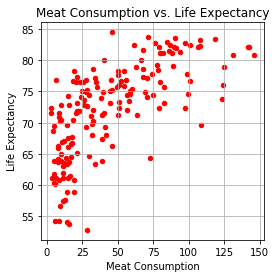

In [24]:
#1st relationship. Meat consumption vs Life Expectancy
lifeexpect_df = merged_df.loc[:, ["Country", "Life Expectancy", "Meat Consumption"]]
lifeexpect_df.head()

avg_lifex =  pd.DataFrame(lifeexpect_df.groupby(["Country", "Life Expectancy"])["Meat Consumption"].mean()).reset_index()



avg_lifex.plot(kind="scatter", x="Meat Consumption", y="Life Expectancy", grid=True, color='red', figsize=(4,4),
              title="Meat Consumption vs. Life Expectancy")
plt.show()

In [ ]:
x_values = avg_lifex['Meat Consumption']
y_values = avg_lifex['Life Expectancy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel('Meat Consumption')
plt.ylabel('Life Expectancy')
plt.show()

In [28]:
region_lifeexpect_df = merged_df.loc[:, ["Regional indicator", "Country", "Life Expectancy", "Meat Consumption"]]
region_lifeexpect_df.head()
reg_lifex_mean = region_lifeexpect_df.groupby('Regional indicator')['Life Expectancy'].mean()
reg_lifex_mean
reg_mc_mean = region_lifeexpect_df.groupby('Regional indicator')['Meat Consumption'].mean()
reg_mc_mean
lifex_mc_summary = pd.DataFrame({'Average Meat Consumption':reg_mc_mean,
                           'Average Life Expectancy':reg_lifex_mean})
lifex_mc_summary

,Average Meat Consumption,Average Life Expectancy
Regional indicator,,
Central and Eastern Europe,64.108333,77.250000
Commonwealth of Independent States,32.425000,72.266667
East Asia,63.775000,76.966667
Latin America and Caribbean,48.733333,74.914286
Middle East and North Africa,39.418750,75.443750
North America and ANZ,120.800000,81.650000
South Asia,10.157143,70.100000
Southeast Asia,28.611111,73.200000
Sub-Saharan Africa,15.711429,62.088571


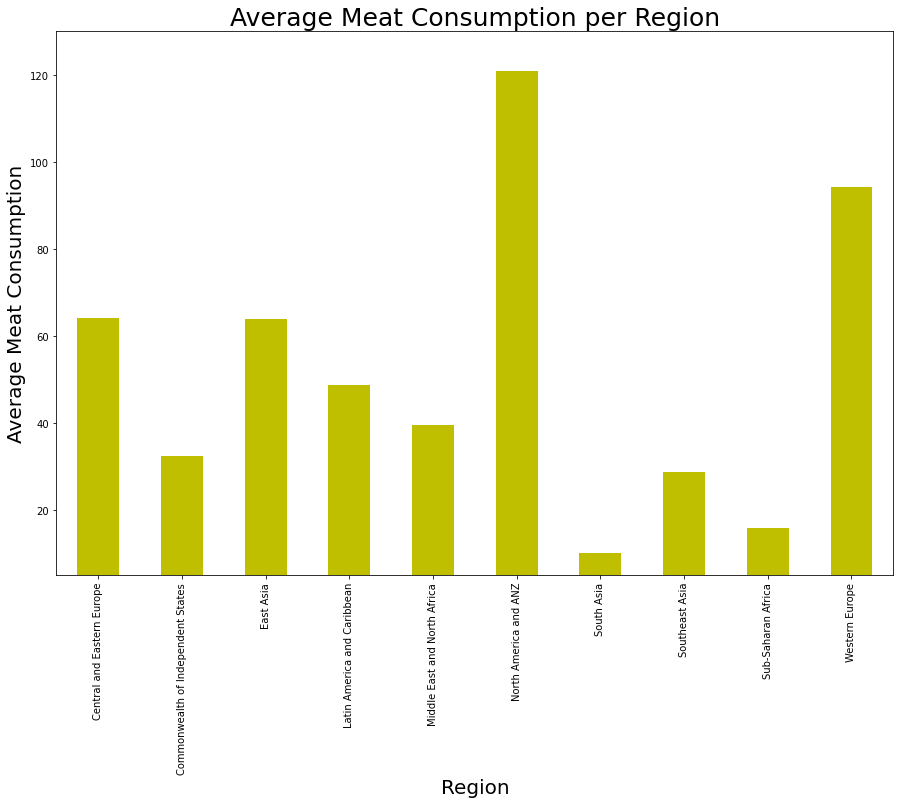

In [29]:
pd_plot = reg_mc_mean.plot.bar(figsize=(15,10),color = 'y')
plt.title("Average Meat Consumption per Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Average Meat Consumption",fontsize=20)
plt.ylim(5, 130)
plt.show()

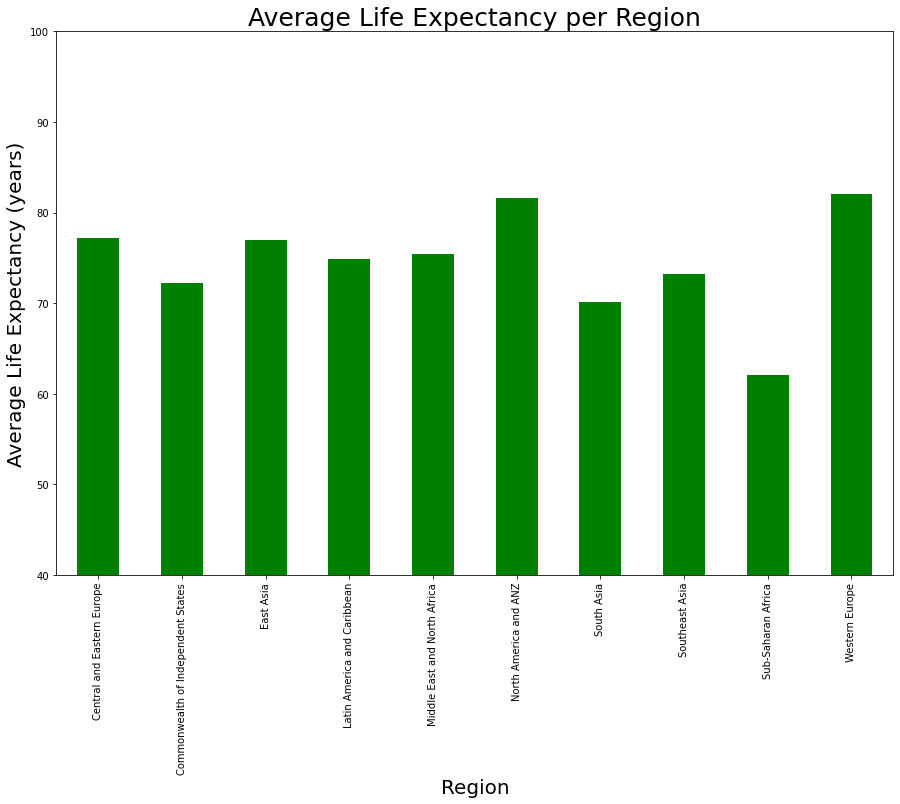

In [30]:
pd_plot = reg_lifex_mean.plot.bar(figsize=(15,10),color = 'g')
plt.title("Average Life Expectancy per Region",fontsize=25)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Average Life Expectancy (years)",fontsize=20)
plt.ylim(40, 100)
plt.show()